In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import timeit


## Pandas

In [2]:

# Load dataset
titanic = sns.load_dataset("titanic")


In [3]:

titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:

pd.Series([1, 90, "hey", np.nan], index=["a", "B", "C", "d"])


a      1
B     90
C    hey
d    NaN
dtype: object

In [5]:

pd.DataFrame({"day": [17, 30], "month": [1, 12], "year": [2010, 2017]})


,day,month,year
0,17,1,2010
1,30,12,2017


In [6]:

titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:

# Returns a scalar
# titanic.ix[4, 'age']
titanic.at[4, "age"]


35.0

In [8]:

# Returns a Series of name 'age', and the age values associated
# to the index labels 4 and 5
# titanic.ix[[4, 5], 'age']
titanic.loc[[4, 5], "age"]


4    35.0
5     NaN
Name: age, dtype: float64

In [9]:

# Returns a Series of name '4', and the age and fare values
# associated to that row.
# titanic.ix[4, ['age', 'fare']]
titanic.loc[4, ["age", "fare"]]


age       35
fare    8.05
Name: 4, dtype: object

In [10]:

titanic.loc[[4, 5], ["age", "fare"]]


,age,fare
4,35.0,8.0500
5,NaN,8.4583


In [11]:

A = pd.Series(["a", "b", "c", "d", "e", "f"])
A_filter = pd.Series([False, True, False, True, False, True, True])
A[A_filter]


1    b
3    d
5    f
dtype: object

In [12]:

titanic[
    (titanic.sex == "female")
    & (titanic["class"].isin(["First", "Third"]))
    & (titanic.age > 30)
    & (titanic.survived == 0)
]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True


In [13]:

s1 = pd.Series([10, 20, 30, np.nan], index=["a", "b", "c", "d"])
s2 = pd.Series([100, 200, 300, 400], index=["e", "d", "c", "b"])
s1.add(s2)


a      NaN
b    420.0
c    330.0
d      NaN
e      NaN
dtype: float64

In [14]:

s1.align(s2)


(a    10.0
 b    20.0
 c    30.0
 d     NaN
 e     NaN
 dtype: float64, a      NaN
 b    400.0
 c    300.0
 d    200.0
 e    100.0
 dtype: float64)

In [15]:

df1 = pd.DataFrame({"a": [1]})
df2 = pd.DataFrame({"b": [2]})

# 1) Incorrect: Raises AttributeError since concat is not in the DataFrame namespace
df1.concat(df2)



AttributeError: 'DataFrame' object has no attribute 'concat'

In [16]:

# 2) Correct
pd.concat([df1, df2], sort=True)


,a,b
0,1.0,NaN
0,NaN,2.0


In [17]:

# 3) Correct, and equivalent to 2)
df1.append(df2, sort=True)


,a,b
0,1.0,NaN
0,NaN,2.0


In [18]:

# 4) Incorrect: append does not accept the 'axis' arg.
#    Should use pd.concat with axis='columns'
df2.append(df2, axis="columns")



TypeError: append() got an unexpected keyword argument 'axis'

In [19]:

# Generate a small DataFrame of cities with their population,
# and fake ages (years with the city status)
towns_dic = {
    "name": ["Southampton", "Cherbourg", "Queenstown", "Montevideo"],
    "country": ["United Kingdom", "France", "United Kingdom", "Uruguay"],
    "population": [236900, 37121, 12347, 1305000],
    "age": [np.random.randint(500, 1000) for _ in range(4)],
}
towns_df = pd.DataFrame(towns_dic)
towns_df


,name,country,population,age
0,Southampton,United Kingdom,236900,675
1,Cherbourg,France,37121,703
2,Queenstown,United Kingdom,12347,587
3,Montevideo,Uruguay,1305000,943


In [20]:

(
    titanic.merge(
        towns_df,
        left_on="embark_town",
        right_on="name",
        how="left",
        indicator=True,
        suffixes=("_passenger", "_city"),
    )
).head()
# 'head' takes the last n elements of the DataFrame


,survived,pclass,sex,age_passenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,country,population,age_city,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Southampton,United Kingdom,236900.0,675.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Cherbourg,France,37121.0,703.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Southampton,United Kingdom,236900.0,675.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Southampton,United Kingdom,236900.0,675.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Southampton,United Kingdom,236900.0,675.0,both


In [21]:

bins = [0, 12, 17, 60, np.inf]
labels = ["child", "teenager", "adult", "elder"]
age_groups = pd.cut(titanic.age, bins, labels=labels)
titanic["age_group"] = age_groups
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,adult
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult


In [22]:

groups = titanic.groupby(["age_group", "alone"])
type(groups)



pandas.core.groupby.generic.DataFrameGroupBy

In [23]:

groups.size()


age_group  alone
child      False     67
           True       2
teenager   False     23
           True      21
adult      False    216
           True     363
elder      False      4
           True      18
dtype: int64

In [24]:

100 * groups.size() / len(titanic)


age_group  alone
child      False     7.519641
           True      0.224467
teenager   False     2.581369
           True      2.356902
adult      False    24.242424
           True     40.740741
elder      False     0.448934
           True      2.020202
dtype: float64

In [25]:


def is_old_func(row):
    return row["age"] > 60


titanic["is_old"] = titanic.apply(is_old_func, axis="columns")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,adult,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,False


In [26]:


def is_old_func_series(value):
    return value > 60


titanic["is_old"] = titanic["age"].apply(is_old_func_series)
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,adult,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,False


In [27]:

titanic.eval("is_old = age > 60", inplace=True)
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,adult,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,False


In [28]:

%timeit -n100 titanic['is_old'] = titanic.apply(is_old_func, axis='columns') # noqa
%timeit -n100 titanic['is_old'] = titanic['age'].apply(is_old_func_series) # noqa
%timeit -n100 titanic.eval('is_old = age > 60', inplace=True) # noqa


114 ms ± 603 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
602 µs ± 9.71 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.07 ms ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:

p_titanic = titanic.drop_duplicates("age").pivot(
    index="age", columns="class", values="fare"
)
p_titanic.tail(3)


class,First,Second,Third
age,,,
71.0,34.6542,NaN,NaN
74.0,NaN,NaN,7.775
80.0,30.0000,NaN,NaN


In [30]:

pt_titanic = titanic.pivot_table(index="age", columns="class", values="fare")
pt_titanic.tail(3)



class,First,Second,Third
age,,,
71.0,42.0792,NaN,NaN
74.0,NaN,NaN,7.775
80.0,30.0000,NaN,NaN


In [31]:

titanic.pivot_table(
    index="embark_town", columns="age_group", values="fare", aggfunc=np.median
)


age_group,child,teenager,adult,elder
embark_town,,,,
Cherbourg,18.7875,14.4542,49.5042,49.5042
Queenstown,29.1250,7.7500,7.7500,7.7500
Southampton,27.9000,14.2500,13.0000,26.5500


In [32]:

pd.melt(
    p_titanic.reset_index(),
    id_vars="age",
    var_name="class_renamed",
    value_vars=["First", "Second", "Third"],
    value_name="fare",
).tail(3)



TypeError: cannot insert an item into a CategoricalIndex that is not already an existing category

Note : At the time of the blogpost, the columns class and deck were of
type object instead of category as they are now.

This causes all sort of issues, including
[this](https://github.com/pandas-dev/pandas/issues/19136) one.
We can work around it with a simple type cast.

In [33]:

p_titanic_copy = p_titanic.copy()
p_titanic_copy.columns = p_titanic_copy.columns.astype(str)
pd.melt(
    p_titanic_copy.reset_index(),
    id_vars="age",
    var_name="class_renamed",
    value_vars=["First", "Second", "Third"],
    value_name="fare",
).tail(3)



,age,class_renamed,fare
264,71.0,Third,NaN
265,74.0,Third,7.775
266,80.0,Third,NaN


In [34]:

titanic.pivot_table(index="embark_town", columns="age_group", aggfunc=np.median).fare



age_group,child,teenager,adult,elder
embark_town,,,,
Cherbourg,18.7875,14.4542,49.5042,49.5042
Queenstown,29.1250,7.7500,7.7500,7.7500
Southampton,27.9000,14.2500,13.0000,26.5500


In [35]:

groups.size().unstack()



alone,False,True
age_group,,
child,67,2
teenager,23,21
adult,216,363
elder,4,18


In [36]:

groups.size().unstack(level=0)


age_group,child,teenager,adult,elder
alone,,,,
False,67,23,216,4
True,2,21,363,18


## Seaborn

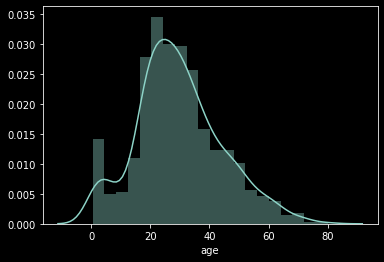

In [37]:

sns.distplot(titanic["age"].dropna())


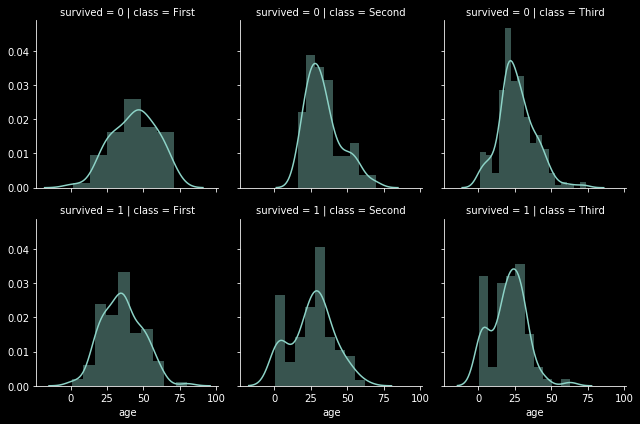

In [38]:

g = sns.FacetGrid(titanic, row="survived", col="class")
g.map(sns.distplot, "age")


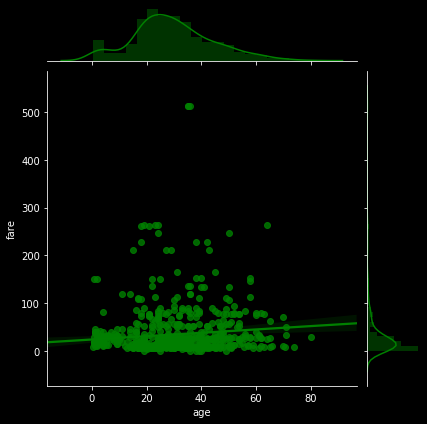

In [39]:

sns.jointplot(data=titanic, x="age", y="fare", kind="reg", color="g")


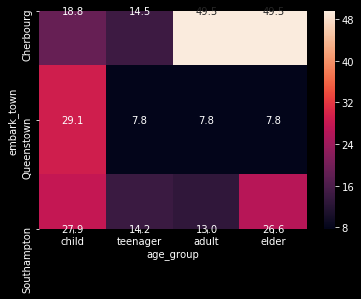

In [40]:

df = titanic.pivot_table(
    index="embark_town", columns="age_group", values="fare", aggfunc=np.median
)
sns.heatmap(df, annot=True, fmt=".1f")



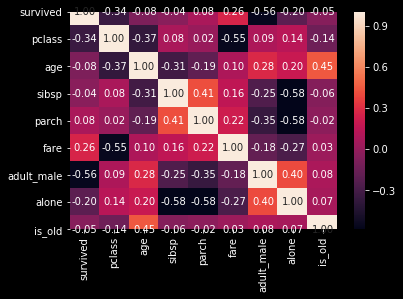

In [41]:

sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
